# LOGISTIC REGRESSION ( FLIGHT DELAY PREDICTION )

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
data = pd.read_csv('C://Users//ashut//OneDrive//Desktop//second semester//GNR652//Assignments, Report//FlightDelays.csv') #Reading the data

In [2]:
data = data.rename(columns={'Flight Status': 'Flight_Status'})

In [3]:
data = data.drop(columns='FL_DATE', axis=1)

### <font color=blue>Let's check the first 5 rows of the dataset

In [4]:
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
0,1455,OH,1455,JFK,184,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,7792,IAD,0,4,1,N698BR,ontime


# EXPLORATORY DATA ANALYSIS

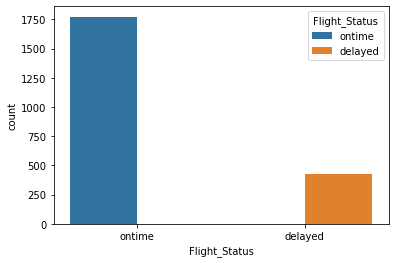

In [5]:
sns.countplot(x="Flight_Status", data=data, hue="Flight_Status")

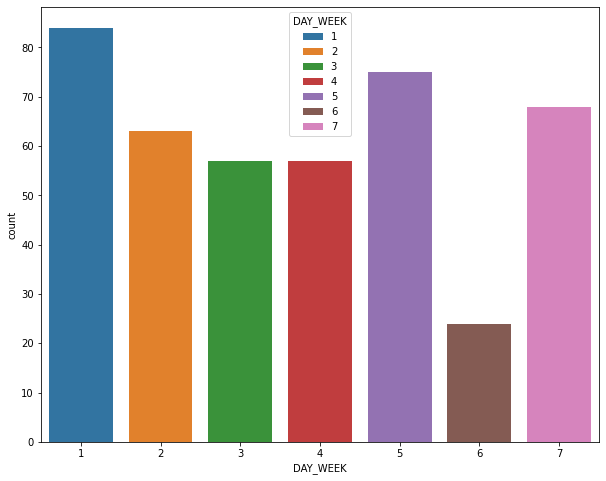

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(x="DAY_WEEK", data=data[data.Flight_Status=='delayed'], hue="DAY_WEEK",dodge=False)

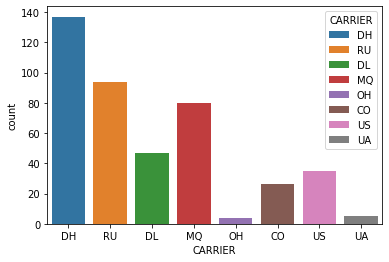

In [7]:
sns.countplot(x="CARRIER", hue="CARRIER", data=data[data.Flight_Status=='delayed'],dodge=False)

In [8]:
delayed_df = data[data['Flight_Status']=='delayed']

In [9]:
delayed_df

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
53,1455,DH,1531,LGA,229,7211,IAD,0,5,2,N665BR,delayed
56,1039,DH,1236,LGA,229,7792,IAD,0,5,2,N665BR,delayed
62,2120,DH,2305,JFK,228,7814,IAD,0,5,2,N657BR,delayed
96,1245,DH,1350,EWR,213,7303,IAD,0,5,2,N686BR,delayed
97,1430,DH,1512,EWR,213,7307,IAD,0,5,2,N309UE,delayed
...,...,...,...,...,...,...,...,...,...,...,...,...
2146,1525,RU,1601,EWR,199,2261,DCA,0,5,30,N13979,delayed
2149,1500,RU,1456,EWR,213,2156,IAD,0,5,30,N21144,delayed
2150,700,RU,659,EWR,213,2855,IAD,0,5,30,N11121,delayed
2156,840,DH,931,JFK,228,7800,IAD,0,6,31,N655BR,delayed


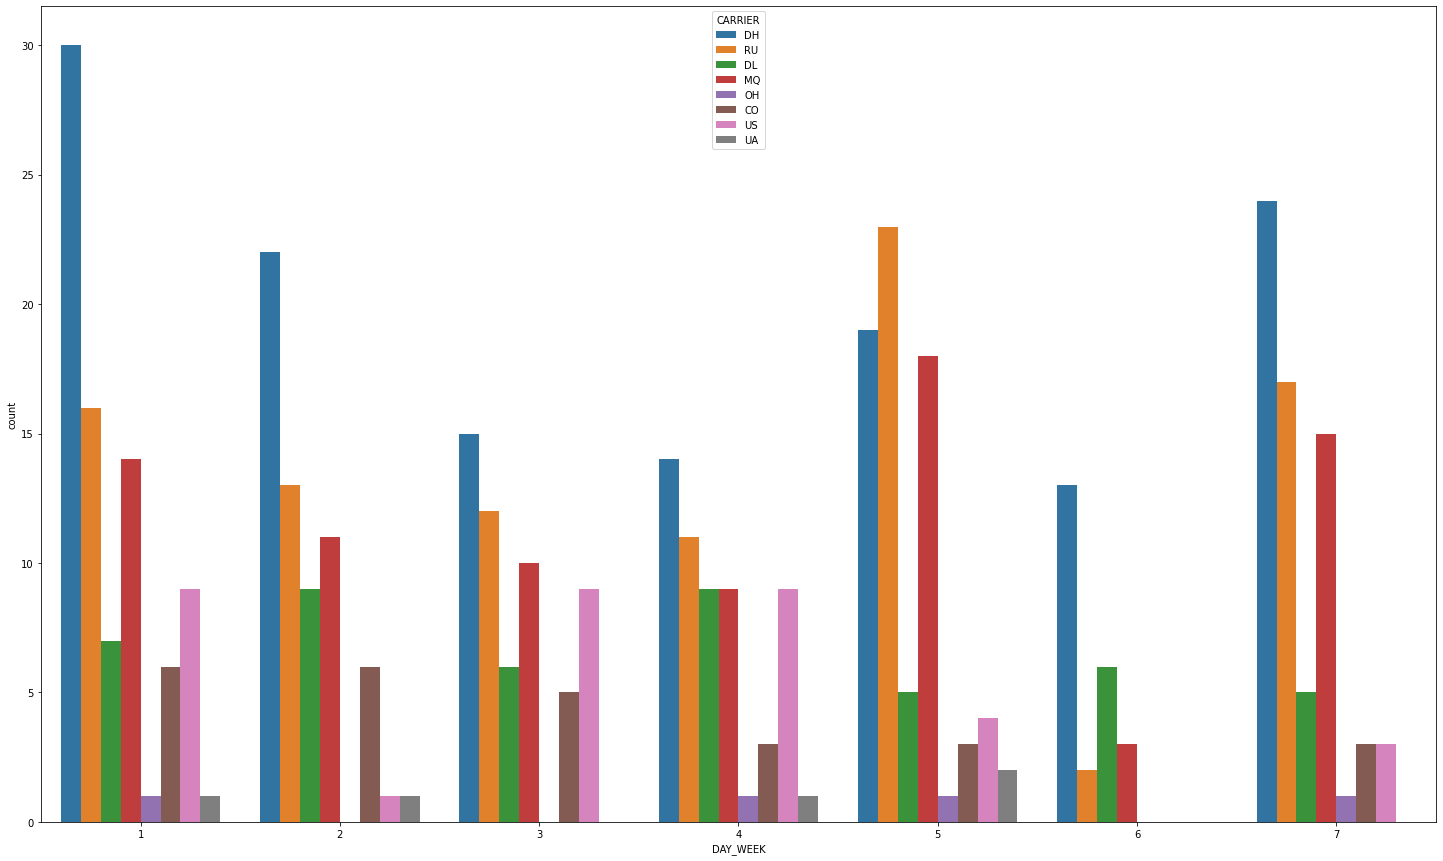

In [10]:
plt.figure(figsize=(25,15))
sns.countplot(data=delayed_df, x ='DAY_WEEK', hue='CARRIER')

In [11]:
df_day6 = data.loc[data['DAY_WEEK'].isin(['6'])]
carriers_nodelay_6 = ['OH', 'UA', 'US', 'CO']
carriers_no_delay = df_day6.loc[df_day6['CARRIER'].isin(['OH', 'UA', 'US', 'CO'])]
origin = carriers_no_delay.loc[carriers_no_delay['ORIGIN'].isin(['DCA'])]
destination = origin.loc[origin['DEST'].isin(['LGA'])]
destination

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight_Status
138,700,US,655,LGA,214,2160,DCA,0,6,3,N760UW,ontime
139,900,US,858,LGA,214,2164,DCA,0,6,3,N710UW,ontime
140,1100,US,1059,LGA,214,2168,DCA,0,6,3,N760UW,ontime
141,1300,US,1256,LGA,214,2172,DCA,0,6,3,N710UW,ontime
142,1500,US,1500,LGA,214,2176,DCA,0,6,3,N760UW,ontime
143,1700,US,1658,LGA,214,2180,DCA,0,6,3,N710UW,ontime
144,1900,US,1857,LGA,214,2184,DCA,0,6,3,N760UW,ontime
667,700,US,655,LGA,214,2160,DCA,0,6,10,N722UW,ontime
668,900,US,857,LGA,214,2164,DCA,0,6,10,N750UW,ontime
669,1100,US,1056,LGA,214,2168,DCA,0,6,10,N722UW,ontime


In [12]:
def pred_delay(FL_DATE,DEP_TIME, ORIGIN, DEST):
    y_pred = logmodel.predict(x_test)

### <font color=blue> We see that the data is mix of categorical and numerical data. For Logistic regression, we need to convert the categorical to numerical data using one hot encoding for the feature varibles and label encoding for the target. So let us separate the feature varible and target.

### <font color=blue> Now we will use one hot encoding to convert the categorical value to numerical.

In [13]:
x = data.drop(columns='Flight_Status')
y = data['Flight_Status']

In [14]:
x = pd.get_dummies(x)

### <font color=blue> training and testing with all the features after one hot encoding

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.4, random_state = 1)

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
log_reg = LogisticRegression()
log_reg.fit(x_scaled,y_train)

LogisticRegression()

In [18]:
y_pred = log_reg.predict(x_test)

In [19]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.775255391600454

In [20]:
log_odds = log_reg.coef_[0]
coeff_df = pd.DataFrame(log_odds, 
             x.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

### <font color=brown> logistic regression coefficients aren’t as easily interpreted. This is because logistic regression uses the logit link function to “bend” our line of best fit and convert our classification problem into a regression problem. Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them. Happily, this is done by simply exponentiating the log odds coefficients, which we can do with np.exp()

### <font color=brown> Now we will set threshold for the coefficients to only select the coefficients with higher magnitudes

In [21]:
coeff_df3 = coeff_df[coeff_df.coef > 0.25]

In [22]:
coeff_df3

,coef
CRS_DEP_TIME,3.071945
TAIL_NUM_N225DL,0.510480
FL_NUM,0.475840
CARRIER_US,0.306269


In [23]:
coeff_df4 = coeff_df[coeff_df.coef < -0.30]

In [24]:
coeff_df4

,coef
TAIL_NUM_N11150,-0.303556
TAIL_NUM_N684BR,-0.307452
TAIL_NUM_N697BR,-0.309875
CARRIER_MQ,-0.344497
TAIL_NUM_N667BR,-0.352186
Weather,-0.839801
DEP_TIME,-3.731294


In [25]:
coeff_df5 = [coeff_df3,coeff_df4]

In [26]:
coeff_df5 = pd.concat(coeff_df5)

In [27]:
coeff_df5

,coef
CRS_DEP_TIME,3.071945
TAIL_NUM_N225DL,0.510480
FL_NUM,0.475840
CARRIER_US,0.306269
TAIL_NUM_N11150,-0.303556
TAIL_NUM_N684BR,-0.307452
TAIL_NUM_N697BR,-0.309875
CARRIER_MQ,-0.344497
TAIL_NUM_N667BR,-0.352186
Weather,-0.839801


### <font color=brown> Now we will plot the coefficients and see how are the values distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

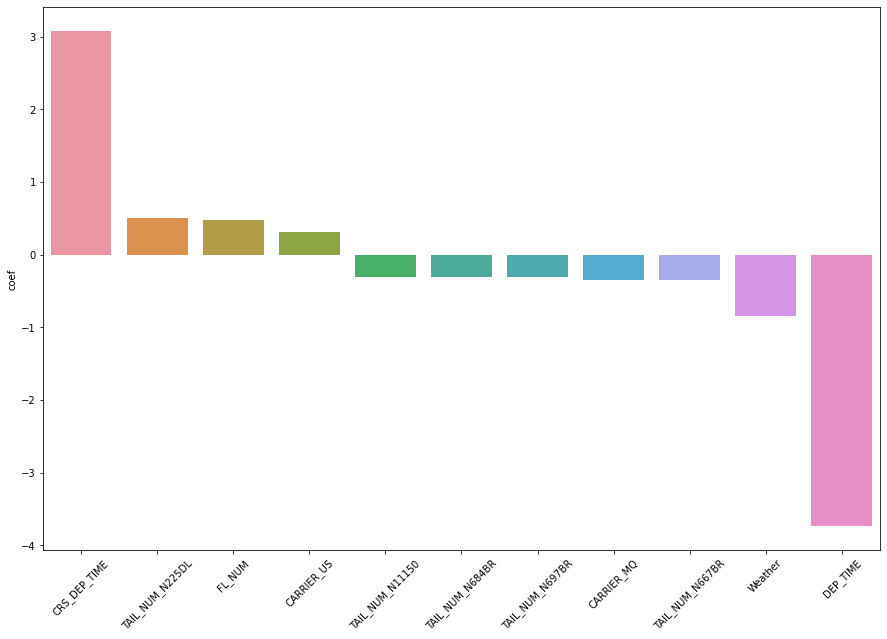

In [28]:
plt.figure(figsize=(15,10))
filter_coeff = coeff_df5
sns.barplot(data=filter_coeff, x=filter_coeff.index, y='coef')  
plt.xticks(rotation=45)

In [29]:
new_data = x[(coeff_df4 + coeff_df3).index]

In [30]:
new_data

,CARRIER_MQ,CARRIER_US,CRS_DEP_TIME,DEP_TIME,FL_NUM,TAIL_NUM_N11150,TAIL_NUM_N225DL,TAIL_NUM_N667BR,TAIL_NUM_N684BR,TAIL_NUM_N697BR,Weather
0,0,0,1455,1455,5935,0,0,0,0,0,0
1,0,0,1640,1640,6155,0,0,0,0,0,0
2,0,0,1245,1245,7208,0,0,0,0,0,0
3,0,0,1715,1709,7215,0,0,0,0,0,0
4,0,0,1039,1035,7792,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2196,0,0,645,644,2761,0,0,0,0,0,0
2197,0,0,1700,1653,2497,0,0,0,0,0,0
2198,0,0,1600,1558,2361,0,0,0,0,0,0
2199,0,0,1359,1403,2216,0,0,0,0,0,0


In [31]:
y

0       ontime
1       ontime
2       ontime
3       ontime
4       ontime
         ...  
2196    ontime
2197    ontime
2198    ontime
2199    ontime
2200    ontime
Name: Flight_Status, Length: 2201, dtype: object

In [32]:
x_train,x_test,y_train,y_test = train_test_split(new_data,y, test_size= 0.4, random_state = 650)

In [33]:
scaler = StandardScaler()
scaler.fit(x_train)
x_scaled = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [34]:
log_reg = LogisticRegression()
log_reg.fit(x_scaled,y_train)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8864926220204313

### <font color=red> Thus, the accuracy of our logistic regression model by doing feature selection has improved significantly. 